## 変分問題を深層展開で解く

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### グローバル変数の設定

In [2]:
δ = 0.05
β = 20.0
N = 100
T = 1.0
λ = 1000.0
train_itr = 300

300

### 放射基底関数の準備

In [3]:
function rbf_func(x, θ)
    rbf(x, β) = exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

rbf_func (generic function with 1 method)

In [4]:
function d_rbf_func(x, θ)
    d_rbf(x, β) = -2β*x*exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*d_rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

d_rbf_func (generic function with 1 method)

### 放射基底関数のプロット例

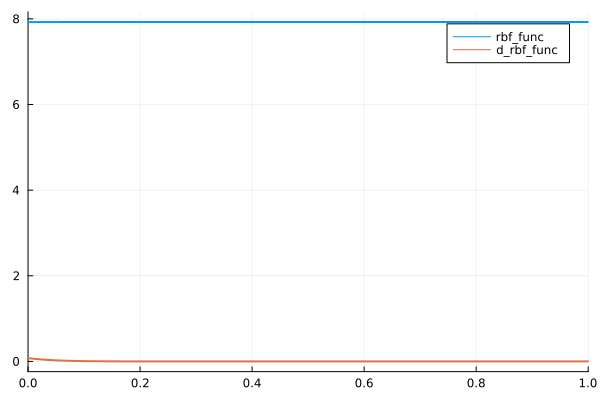

In [5]:
# example
θ = ones(50)
plot(x->rbf_func(x, θ),  lw=2, xlims=[0,1],label="rbf_func")
plot!(x->d_rbf_func(x, θ),  lw=2, label="d_rbf_func")

### 微分可能数値積分モジュール

In [6]:
function Integrate(T, N, θ, λ)
    dt = T/N
    s = 0.0
    for i in 1:N
        y = rbf_func(i*dt, θ)      
        y′ = d_rbf_func(i*dt, θ)
        F = -(y^2 - y′^2 + y*i*dt)
        s += F*dt # loss function 
    end
    s = s + λ*(rbf_func(0, θ) - 0.0)^2 + λ*(rbf_func(1, θ) - 0.0)^2　
    return s
end


Integrate (generic function with 1 method)

### 学習プロセス

In [7]:
opt = Flux.ADAM(1.0) 
θ_train = ones(50)
ps = Flux.params(θ_train)
function train(T, N, θ, ps)
    for i in 1:train_itr
        gs = Flux.gradient(ps) do
            Integrate(T, N, θ, λ)
        end
        Flux.Optimise.update!(opt, ps, gs)
        println(Integrate(T, N, θ, λ))
    end
end

train (generic function with 1 method)

In [8]:
train(T, N, θ_train, ps)

-3.578342673852095e-11
56368.5969348514
69562.82776566184
30169.242995795194
1477.8676195549951
8318.905777998774
29728.544482821333
34980.513879916325
21004.339356610377
4596.21110483746
388.8354647529391
8631.014155393701
17595.873293626664
17433.60550040598
9307.929123347552
1530.3245320538044
539.5009636244959
5414.8816084884
9855.57468003815
9157.330104884535
4452.653168308892
502.9452843877932
577.3131780175545
3558.9077885454544
5675.551385902048
4675.88647135009
1826.2625759717998
51.85711931045971
742.8572631566458
2565.345681489438
3242.382105097421
2087.1137557869874
470.97185274142817
45.42478783704445
934.2950647472954
1825.2396917213368
1626.8845710922315
642.8061683183823
12.857343122803698
302.3970505630367
946.5508942647314
1071.1094794682062
554.9298716092605
52.637705563165184
100.97184192379987
497.9444514651992
659.6998630636513
388.4918285653512
53.015016740282476
43.88692576361916
284.34871458239365
399.97648257778576
239.4308417716589
31.43162470766226
29.795504

### DU-RR法による数値解と厳密解の比較

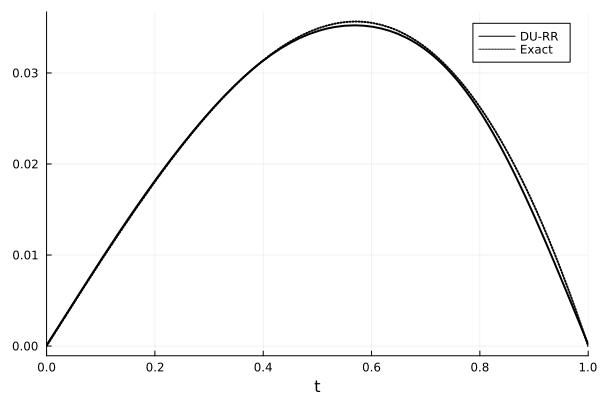

In [9]:
plot(x->rbf_func(x, θ_train),  lw=2, xlims=[0,1],label="DU-RR", xlabel="t",color=:black)
plot!(x->sin(x)/(2*sin(1.0)) - x/2, lw=2, label="Exact",color=:black, ls=:dot)

In [10]:
savefig("DU-RR.pdf")

"/Users/wadayama/Dropbox/DU-Book_test/Chapter_6/DU-RR.pdf"